#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#### Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('D:\\Data Science\\Projects\\Gold price prediction\\gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [4]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


#### Data pre-processing and analysis

In [6]:
# checking for null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# statistical features
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [8]:
correlation = gold_data.corr()

<AxesSubplot:>

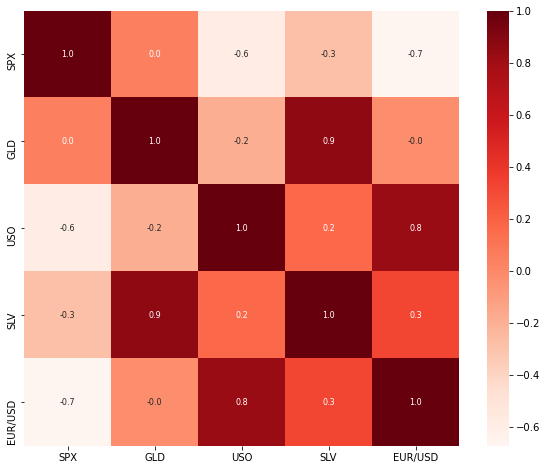

In [9]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (10,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [10]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\swarn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


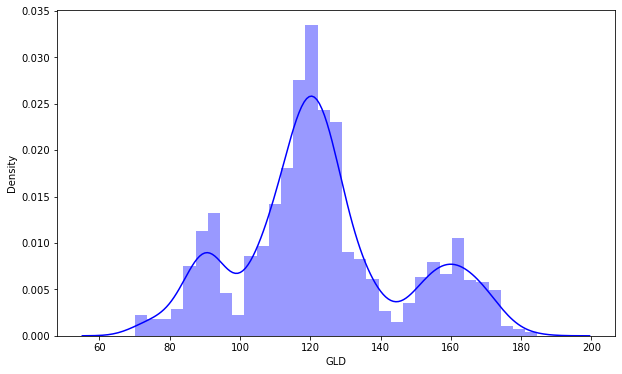

In [11]:
# checking the distribution of the GLD Price
plt.figure(figsize=(10,6))
sns.distplot(gold_data['GLD'], color='blue')
plt.show()

Splitting the Features and Target

In [26]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [31]:
# Splitting into Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

X_train = X_train.drop(['Date'],axis=1)

In [32]:
# training the model Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [35]:
# Saving the date for later
final_df = pd.DataFrame()
final_df['Date'] = X_test['Date']

X_test = X_test.drop(["Date"],axis=1)

In [36]:
# prediction on Test Data


test_data_prediction = regressor.predict(X_test)
# print(test_data_prediction)

In [37]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9883467830861237


Compare the Actual Values and Predicted Values in a Plot

In [38]:
Y_test = list(Y_test)

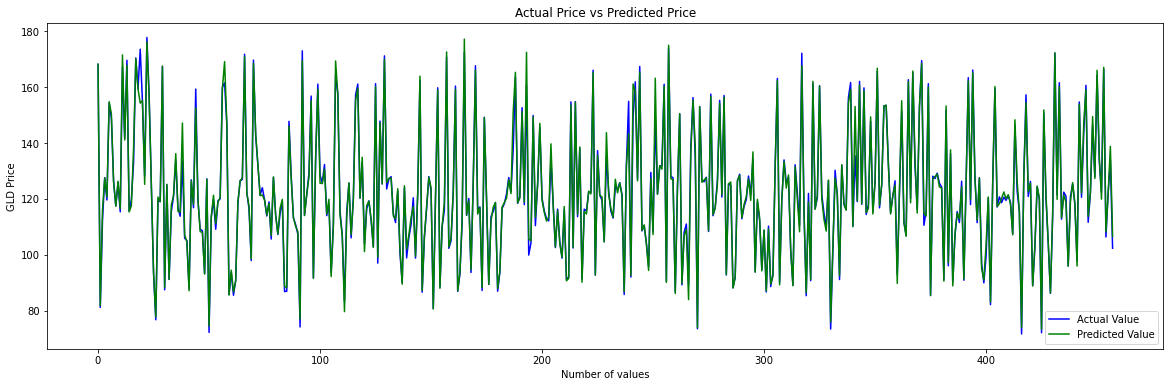

In [39]:
plt.figure(figsize=(20,6))
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [40]:
#saving the predicted values

final_df['Predicted values'] = test_data_prediction
final_df
# final_df.to_csv('submission.csv', index=False)

,Date,Predicted values
903,2/9/2012,168.202500
129,8/26/2008,81.877600
1787,2/5/2016,115.982100
1913,9/8/2016,127.511000
2048,4/5/2017,120.703301
...,...,...
923,3/9/2012,167.035997
1693,9/10/2015,108.262799
2054,4/17/2017,121.754999
658,1/6/2011,138.774301
